### Load the ness--->
### load the dataset--->
### EDA--->
#1. INFO
#2. Cleaining and soo on
### Feature eng. ---->Encoding or rescaling
### Feature selection----
### model building
### MOdel evaluation
### MOdel deployment.


# Problem Statement
Insurance premiums are often based on various factors that in the end decide the amount that will be covered from the insurance company.
As a data analyst/scientist you are given a set of historical data for an organizations customers and the respective charges that were levied upon the insurance company.

The data gives you the information about the users including their age, sex, bmi, hospitalization history, annual income, etc. Analyze and gather insights fron the data and create a linear regression model that will best predict the insurance charges for a new set of data.

## Dataset Information
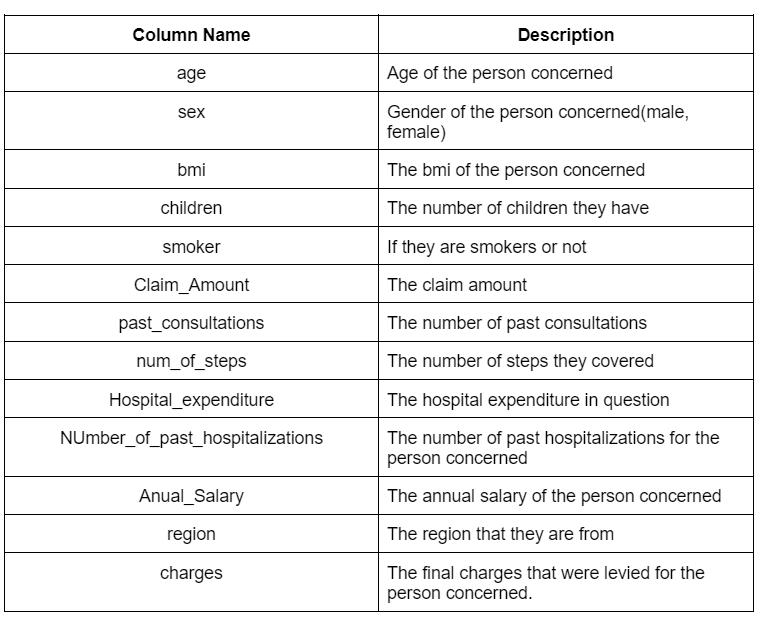

## Importing Initial Python Packages to build an approach towards the business Problem

In [ ]:
import numpy as np   #numerical python
import pandas as pd  #data manipulation
import matplotlib.pyplot as plt  #visul
import seaborn as sns#visul

## Loading the dataset

In [ ]:
insurance = pd.read_csv('new_insurance_data.csv')

In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [ ]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [ ]:
insurance.shape

(1338, 13)

In [ ]:
insurance.ndim

2

In [ ]:
#data information
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [ ]:
insurance.describe().round()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
count,1329.0,1335.0,1333.0,1324.0,1332.0,1335.0,1334.0,1336.0,1.332000e+03,1338.0
mean,39.0,31.0,1.0,33361.0,15.0,910005.0,15841792.0,1.0,3.696849e+08,13270.0
std,14.0,6.0,1.0,15617.0,7.0,91886.0,26693048.0,1.0,5.668843e+08,12110.0
min,18.0,16.0,0.0,1920.0,1.0,695430.0,29453.0,0.0,2.747072e+06,1122.0
25%,27.0,26.0,0.0,20769.0,9.0,847200.0,4077633.0,1.0,7.701932e+07,4740.0
50%,39.0,30.0,1.0,33700.0,15.0,914300.0,7490337.0,1.0,1.419361e+08,9382.0
75%,51.0,35.0,2.0,45052.0,20.0,971684.0,10840822.0,1.0,3.243499e+08,16640.0
max,64.0,53.0,5.0,77278.0,40.0,1107872.0,261631699.0,3.0,4.117197e+09,63770.0


###AGE
1. Avg. age of people in this data is 39 years.
2. Mim. age of people in this data is 18 years.
3. Max. age of people in this data is 64 years
4. 25% people age in this data is below 27
5. 50% people age is this data is below 39
6. 75% people age is this data is below 51
7. Variablity in the points are 14

In [ ]:
Q1=26
Q3=35
iqr=Q3-Q1
iqr

9

In [ ]:
1.5*iqr

13.5

In [ ]:
up=Q3+13.5

In [ ]:
up

48.5

In [ ]:
82/2

41.0

In [ ]:
UP=Q3+1.5*IQR
UP

71.0

Age-
18-64
39--->


In [ ]:
insurance.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [ ]:
insurance.describe(include='all')

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
count,1329.000000,1338,1335.000000,1333.000000,1338,1324.000000,1332.000000,1.335000e+03,1.334000e+03,1336.000000,1.332000e+03,1338,1338.000000
unique,NaN,2,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,male,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,southeast,NaN
freq,NaN,676,NaN,NaN,1064,NaN,NaN,NaN,NaN,NaN,NaN,364,NaN
mean,39.310008,NaN,30.665112,1.090773,NaN,33361.327180,15.216216,9.100047e+05,1.584179e+07,1.060629,3.696849e+08,NaN,13270.422265
std,14.034818,NaN,6.101690,1.201856,NaN,15617.288337,7.467723,9.188612e+04,2.669305e+07,0.533583,5.668843e+08,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,1920.136268,1.000000,6.954300e+05,2.945253e+04,0.000000,2.747072e+06,NaN,1121.873900
25%,27.000000,NaN,26.302500,0.000000,NaN,20768.860390,9.000000,8.471995e+05,4.077633e+06,1.000000,7.701932e+07,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,33700.310675,15.000000,9.143000e+05,7.490337e+06,1.000000,1.419361e+08,NaN,9382.033000
75%,51.000000,NaN,34.687500,2.000000,NaN,45052.331957,20.000000,9.716840e+05,1.084082e+07,1.000000,3.243499e+08,NaN,16639.912515


## Checking the distribution of each of the variables in the dataset

/tmp/ipython-input-920207130.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=insurance['age'])


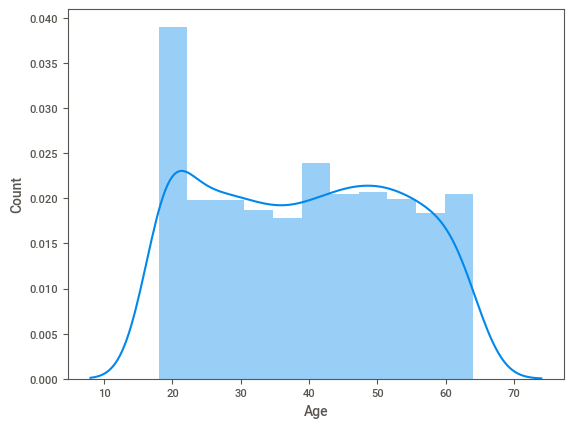

In [ ]:
#distribution of age column
sns.distplot(x=insurance['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Interpretations From the plot
The distribution is not normally distributed, and peaks towards 20.


/tmp/ipython-input-1697657849.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=insurance['bmi'])


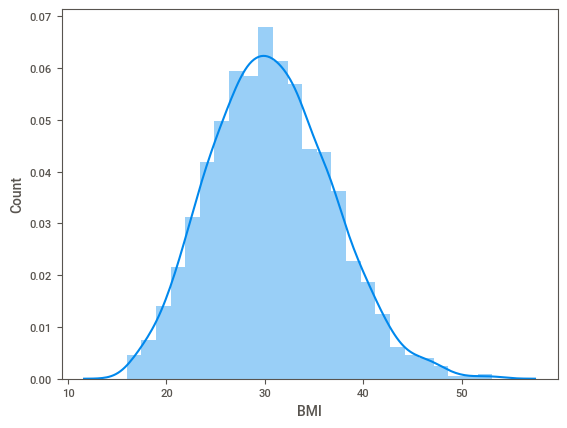

In [ ]:
#distribution of bmi column
sns.distplot(x=insurance['bmi'])
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

### Interpretations from the plot
The distribution can be assumed as a normal distribution that peaks towards 30.

/tmp/ipython-input-1006987078.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=insurance['children'])


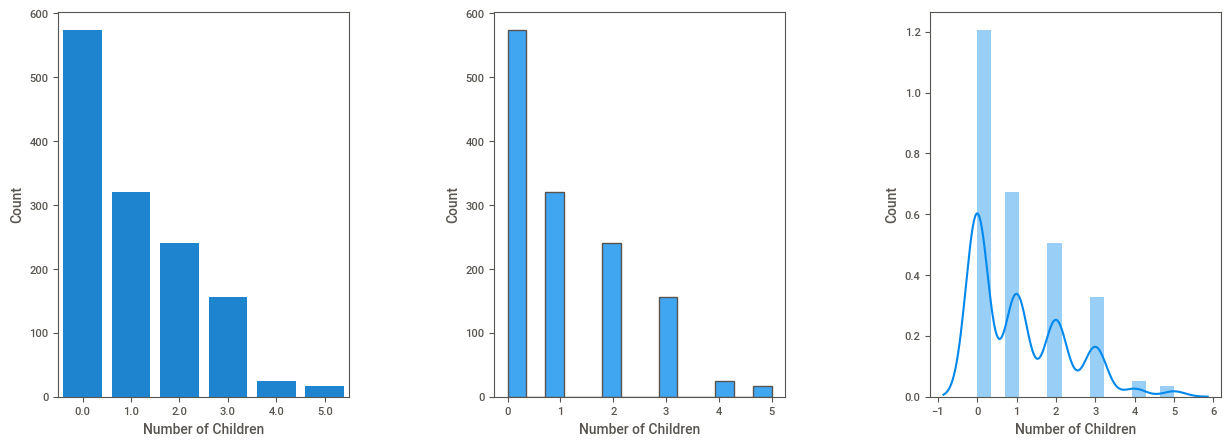

In [ ]:
#distribution of children column
plt.subplots(1,3, figsize=(15,5))

plt.subplot(1,3,1)
sns.countplot(x=insurance['children'])
plt.xlabel('Number of Children')
plt.ylabel('Count')


plt.subplot(1,3,2)
sns.histplot(x=insurance['children'])
plt.xlabel('Number of Children')
plt.ylabel('Count')


plt.subplot(1,3,3)
sns.distplot(x=insurance['children'])
plt.xlabel('Number of Children')
plt.ylabel('Count')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

### Interpretations from the plot
The distribution is not normally distributed, and we can deduce that most of the customers do not have child in the data.

/tmp/ipython-input-2418791418.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=insurance['Claim_Amount'])


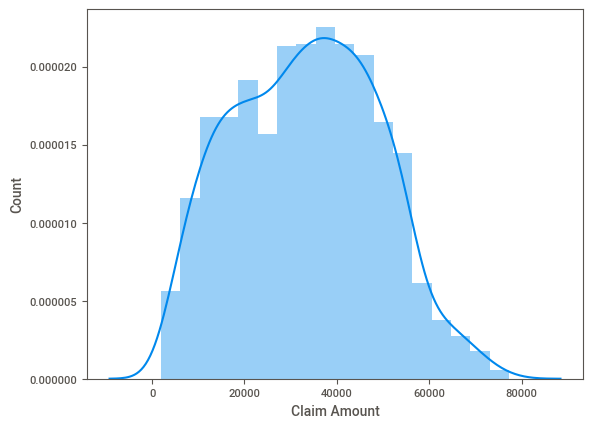

In [ ]:
#distribution of claim amount
sns.distplot(x=insurance['Claim_Amount'])
plt.xlabel('Claim Amount')
plt.ylabel('Count')
plt.show()

### Interpretations from the plot
The distribution is right skewed - majority of the claim amount falls unders the lower ranges of the entire data.

/tmp/ipython-input-3452699715.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=insurance['past_consultations'])


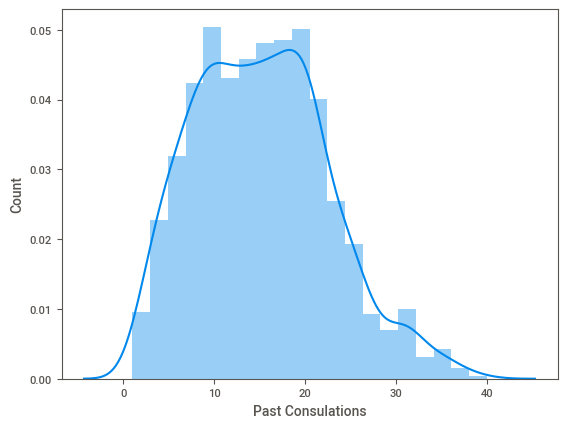

In [ ]:
#distribution of past consultations
sns.distplot(x=insurance['past_consultations'])
plt.xlabel('Past Consulations')
plt.ylabel('Count')
plt.show()

### Interpretations from the plot
The past consultations is right skewed, most of the consultations falls under 25.

/tmp/ipython-input-244719660.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=inss['num_of_steps'])


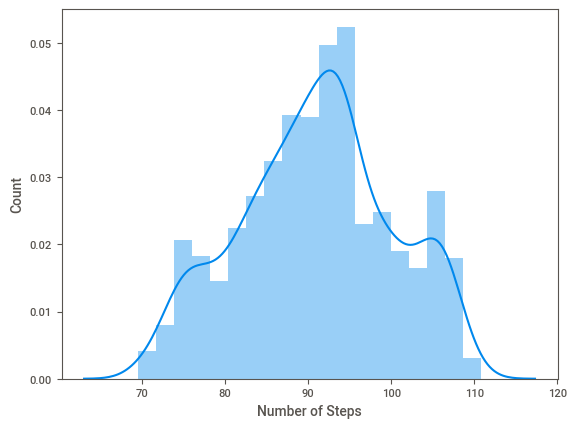

In [ ]:
#distribution of number of steps column
inss = insurance.copy()
inss['num_of_steps'] = inss['num_of_steps'].div(10000).round(2)
sns.distplot(x=inss['num_of_steps'])
plt.xlabel('Number of Steps')
plt.ylabel('Count')
plt.show()

### Interpretations from the plot
The distribution can roughly be assumed as a normal distribution, but the plot is left skewed.

/tmp/ipython-input-1851371070.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=inss['Hospital_expenditure'])


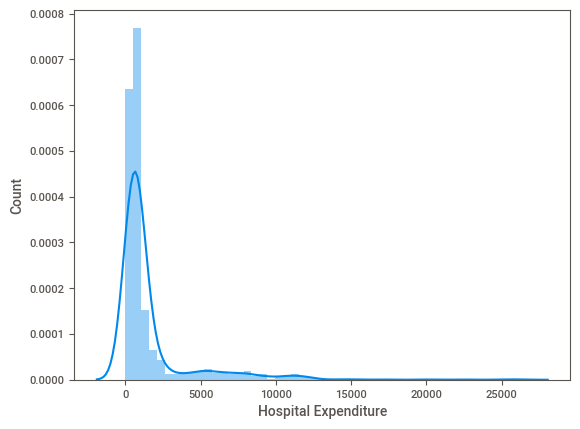

In [ ]:
#distribution of hospital expenditure
inss['Hospital_expenditure'] = inss['Hospital_expenditure'].div(10000).round(2)
sns.distplot(x=inss['Hospital_expenditure'])
plt.xlabel('Hospital Expenditure')
plt.ylabel('Count')
plt.show()

### Interpretations from the plot
the distribution is right skewed for the hospital Expenditure

/tmp/ipython-input-25791002.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=insurance['NUmber_of_past_hospitalizations'])


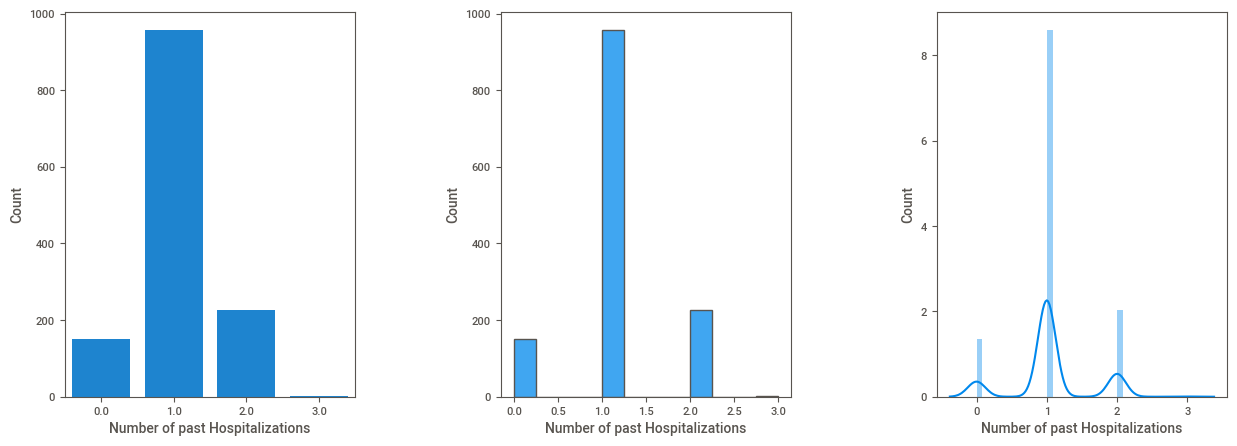

In [ ]:
#distribution of number of past hospitalizations
plt.subplots(1,3, figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(x=insurance['NUmber_of_past_hospitalizations'])
plt.xlabel('Number of past Hospitalizations')
plt.ylabel('Count')


plt.subplot(1,3,2)
sns.histplot(x=insurance['NUmber_of_past_hospitalizations'])
plt.xlabel('Number of past Hospitalizations')
plt.ylabel('Count')


plt.subplot(1,3,3)
sns.distplot(x=insurance['NUmber_of_past_hospitalizations'])
plt.xlabel('Number of past Hospitalizations')
plt.ylabel('Count')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

### Interpretations from the plot
The plot shows the customers with 1.0 past hostpitalizations as the highest in the distribution followed by 2.0, 0.0, and 3.0 hospitalizations

/tmp/ipython-input-1568736306.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=insurance['smoker'])


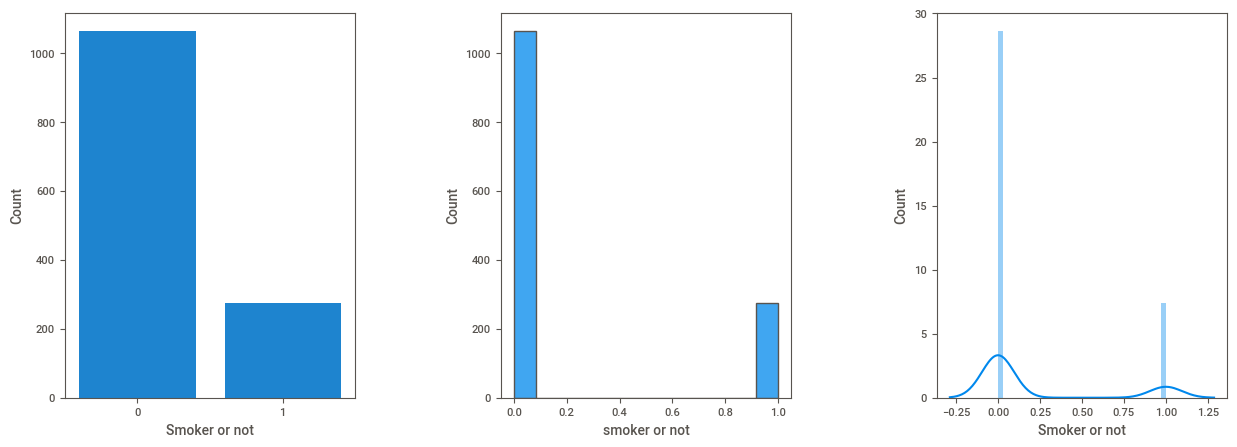

In [ ]:
#distribution of smokers column
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
insurance['smoker'] = le.fit_transform(insurance['smoker'])
insurance['smoker'] = insurance['smoker'].astype(int)

plt.subplots(1,3, figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(x=insurance['smoker'])
plt.xlabel('Smoker or not')
plt.ylabel('Count')


plt.subplot(1,3,2)
sns.histplot(x=insurance['smoker'])
plt.xlabel('smoker or not')
plt.ylabel('Count')


plt.subplot(1,3,3)
sns.distplot(x=insurance['smoker'])
plt.xlabel('Smoker or not')
plt.ylabel('Count')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

###homework
### One hot encoding
### ordinal encoding

### Interpretations from the plot
Majority of the distribution shows the presence of non smokers.

/tmp/ipython-input-4255060033.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=insurance['sex'])


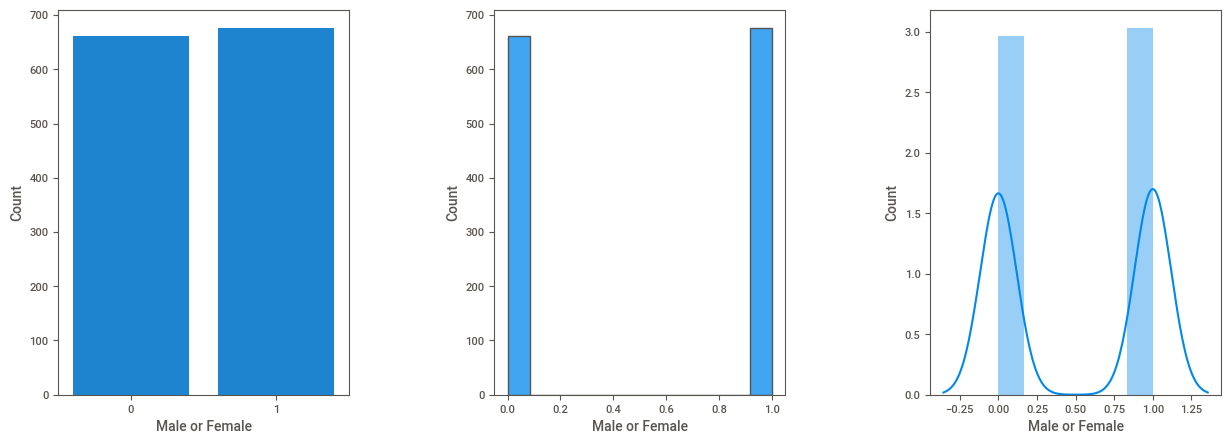

In [ ]:
#distribution of the sex column

insurance['sex'] = le.fit_transform(insurance['sex'])
insurance['sex'] = insurance['sex'].astype(int)

plt.subplots(1,3, figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(x=insurance['sex'])
plt.xlabel('Male or Female')
plt.ylabel('Count')


plt.subplot(1,3,2)
sns.histplot(x=insurance['sex'])
plt.xlabel('Male or Female')
plt.ylabel('Count')


plt.subplot(1,3,3)
sns.distplot(x=insurance['sex'])
plt.xlabel('Male or Female')
plt.ylabel('Count')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

### Interpretations from the plot
The gender column shows the presence of males slighly higher than the female customers.

/tmp/ipython-input-3310515347.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=ins_dum['Anual_Salary'], bins=10)


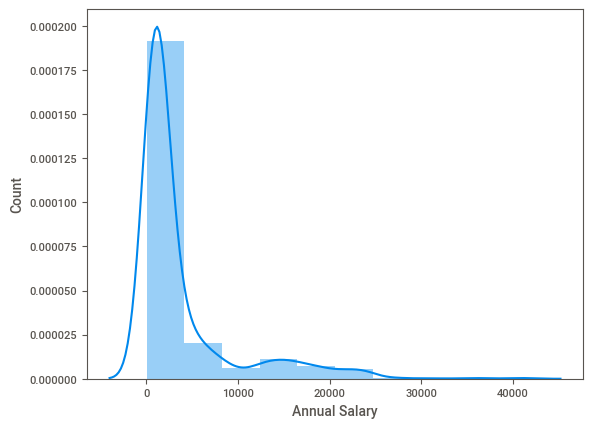

In [ ]:
#distribution of annual salary
ins_dum = insurance.copy()
ins_dum['Anual_Salary'] = ins_dum['Anual_Salary'].div(100000).round(2)
sns.distplot(x=ins_dum['Anual_Salary'], bins=10)
plt.xlabel('Annual Salary')
plt.ylabel('Count')
plt.show()

### Interpretations from the plot
The annual salary distribution is right skewed.

/tmp/ipython-input-2919628030.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=insurance['charges'])


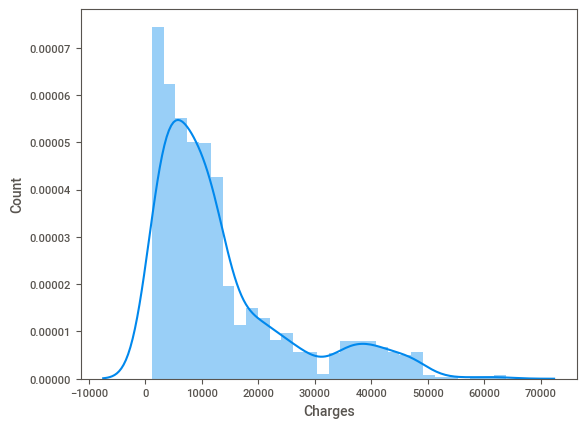

In [ ]:
#distribution of charges column
sns.distplot(x=insurance['charges'])
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()

### Interpretations from the plot
The charges column is also right skewed.

/tmp/ipython-input-2865518842.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=insurance['region'])


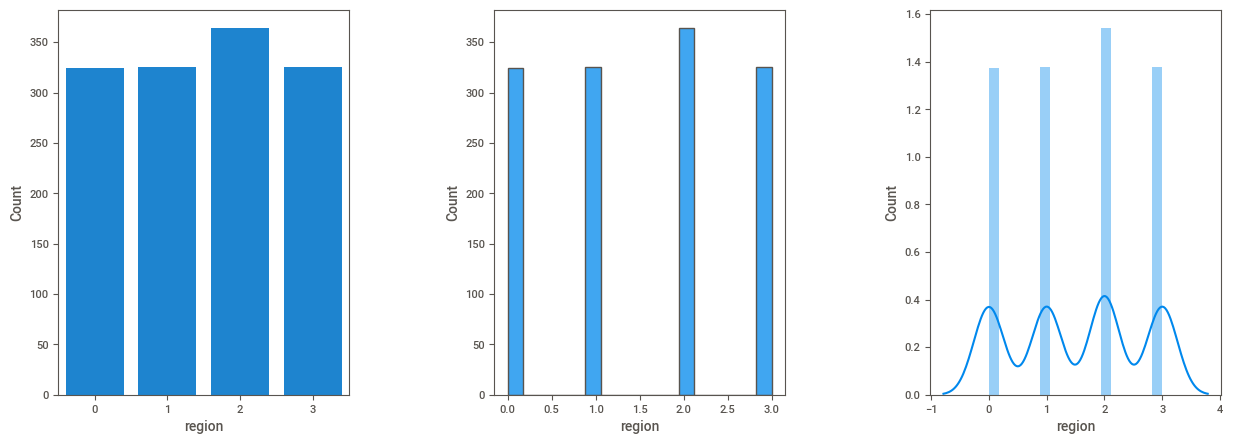

In [ ]:
#distribution of reagions column
insurance['region'] = le.fit_transform(insurance['region'])
insurance['region'] = insurance['region'].astype(int)

plt.subplots(1,3, figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(x=insurance['region'])
plt.xlabel('region')
plt.ylabel('Count')


plt.subplot(1,3,2)
sns.histplot(x=insurance['region'])
plt.xlabel('region')
plt.ylabel('Count')


plt.subplot(1,3,3)
sns.distplot(x=insurance['region'])
plt.xlabel('region')
plt.ylabel('Count')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

### Interpretations from the plot
The region column shows the data distributed equally in the entire population.

## Measure of Peakedness and Outlier Analysis using Boxplots

<Axes: ylabel='age'>

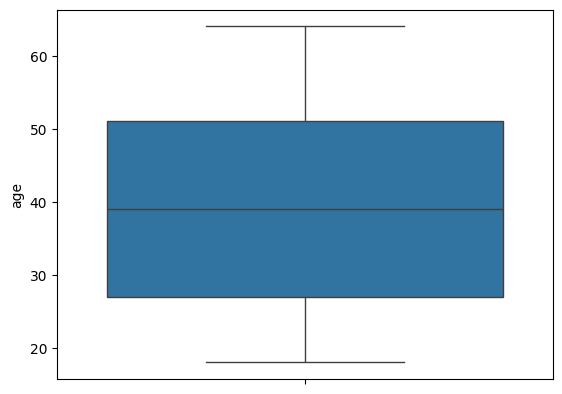

In [ ]:
sns.boxplot(insurance['age'])

<Axes: xlabel='bmi'>

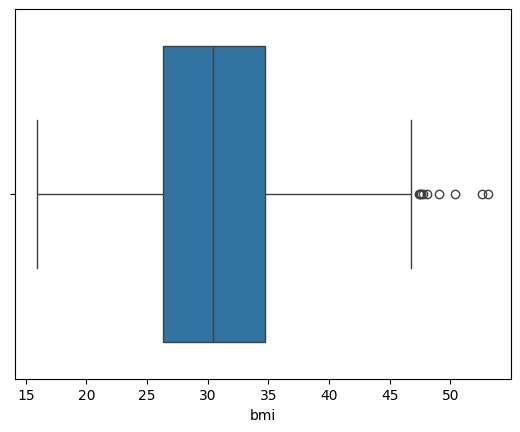

In [ ]:
sns.boxplot(x=insurance['bmi'])

<Axes: xlabel='children'>

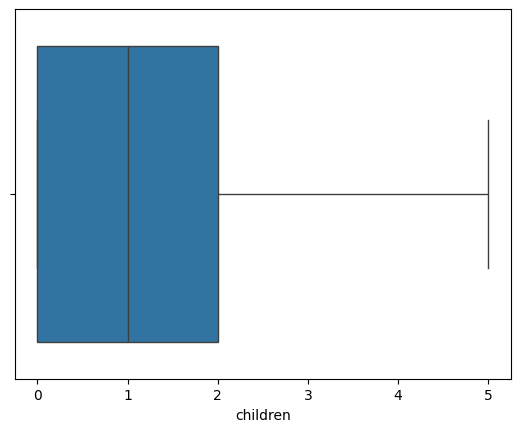

In [ ]:
sns.boxplot(x=insurance['children'])

<Axes: xlabel='Claim_Amount'>

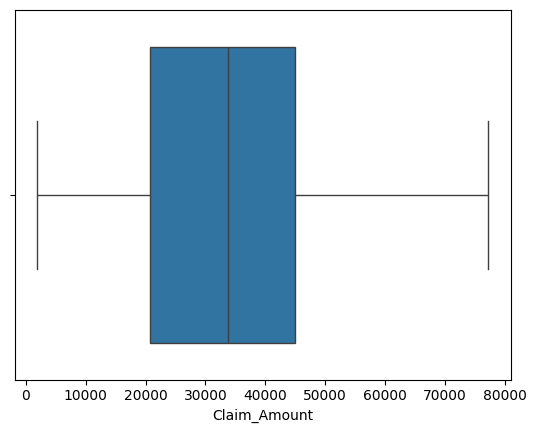

In [ ]:
sns.boxplot(x=insurance['Claim_Amount'])

<Axes: xlabel='past_consultations'>

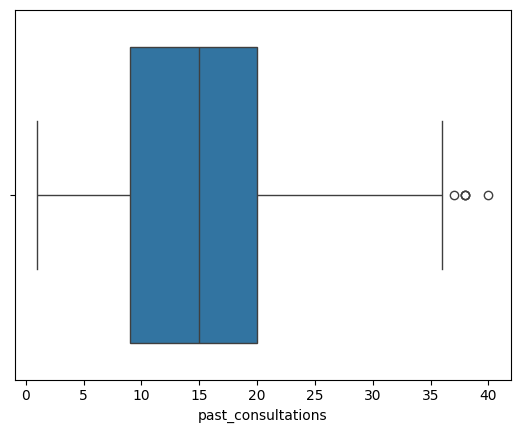

In [ ]:
sns.boxplot(x=insurance['past_consultations'])

<Axes: xlabel='num_of_steps'>

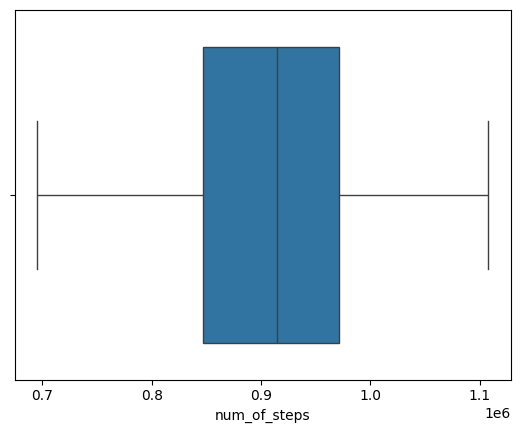

In [ ]:
sns.boxplot(x=insurance['num_of_steps'])

<Axes: xlabel='Hospital_expenditure'>

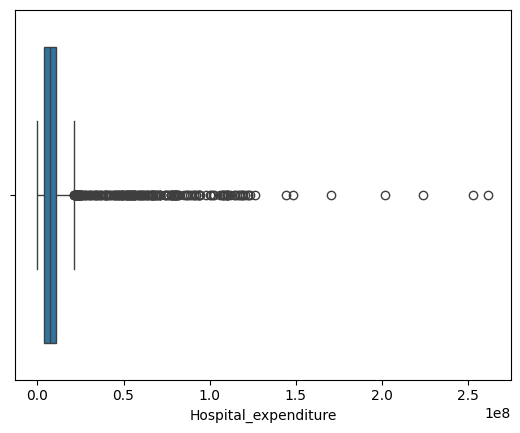

In [ ]:
sns.boxplot(x=insurance['Hospital_expenditure'])

<Axes: xlabel='Anual_Salary'>

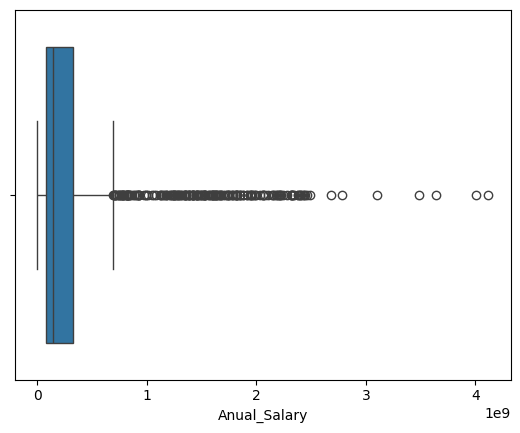

In [ ]:
sns.boxplot(x=insurance['Anual_Salary'])

<Axes: xlabel='region'>

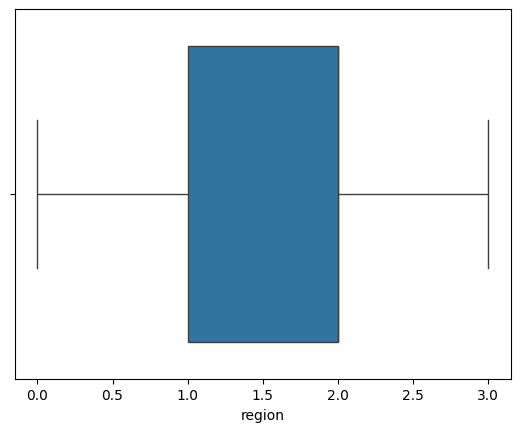

In [ ]:
sns.boxplot(x=insurance['region'])

### Interpretations from the plot

<Axes: xlabel='charges'>

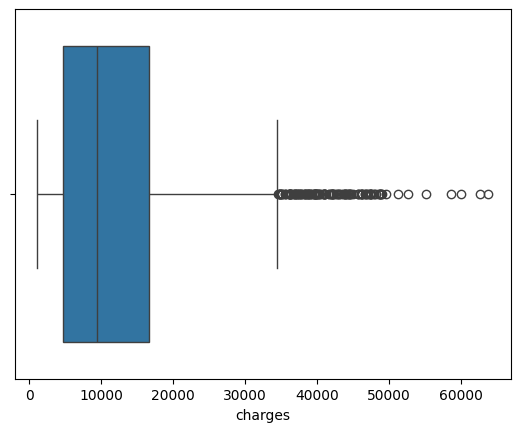

In [ ]:
sns.boxplot(x=insurance['charges'])

### Interpretations from the plots
There is a presence of outliers in the columns 'charges', 'annual_salary', 'hospital_expenditure', 'past_consultations', 'bmi', etc.
1. We will not treat the outliers, since the target variable also consists of outliers which is driven from the other independent variables.

## Data Imputation

In [ ]:
insurance.isna().sum()

,0
age,9
sex,0
bmi,3
children,5
smoker,0
Claim_Amount,14
past_consultations,6
num_of_steps,3
Hospital_expenditure,4
NUmber_of_past_hospitalizations,2


### Approach for data imputation in the insurance data.
1. We have replaced the null values with the mean in columns where it showed close to a normal distribution i.e age, bmi, claim_amount, past_consultations, num_of_steps.
2. For the distributions that showed a skewed distribution, we have replaced the null values with the median of the column.

In [ ]:
insurance['age'] = insurance['age'].fillna(insurance['age'].median())
insurance['bmi'] = insurance['bmi'].fillna(insurance['bmi'].median())
insurance['children'] = insurance['children'].fillna(insurance['children'].median())
insurance['Claim_Amount'] = insurance['Claim_Amount'].fillna(insurance['Claim_Amount'].median())
insurance['past_consultations'] = insurance['past_consultations'].fillna(insurance['past_consultations'].median())
insurance['num_of_steps'] = insurance['num_of_steps'].fillna(insurance['num_of_steps'].median())
insurance['Hospital_expenditure'] = insurance['Hospital_expenditure'].fillna(insurance['Hospital_expenditure'].median())
insurance['NUmber_of_past_hospitalizations'] = insurance['NUmber_of_past_hospitalizations'].fillna(insurance['NUmber_of_past_hospitalizations'].median())
insurance['Anual_Salary'] = insurance['Anual_Salary'].fillna(insurance['Anual_Salary'].median())

In [ ]:
insurance.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
Claim_Amount,0
past_consultations,0
num_of_steps,0
Hospital_expenditure,0
NUmber_of_past_hospitalizations,0


In [ ]:
insurance.shape

(1338, 13)

## Feature Selection for Data Modeling

In [ ]:
correlation = insurance.corr()
correlation

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
age,1.000000,-0.019154,0.112174,0.041710,-0.028792,0.122873,0.168479,0.513066,0.137208,0.359637,0.163478,0.004623,0.293735
sex,-0.019154,1.000000,0.045138,0.018533,0.076185,-0.003821,0.050274,0.010445,0.069940,0.000214,0.072702,0.004588,0.057292
bmi,0.112174,0.045138,1.000000,0.007790,0.003659,0.093447,0.130701,0.135994,0.256924,0.137115,0.241550,0.158218,0.198745
children,0.041710,0.018533,0.007790,1.000000,0.009608,0.041607,0.054806,0.163478,0.025315,0.185546,0.041260,0.015011,0.070877
smoker,-0.028792,0.076185,0.003659,0.009608,1.000000,0.334410,0.502794,0.665656,0.662698,0.588682,0.739676,-0.002181,0.787251
Claim_Amount,0.122873,-0.003821,0.093447,0.041607,0.334410,1.000000,0.271526,0.398285,0.369988,0.379923,0.404026,0.009098,0.435671
past_consultations,0.168479,0.050274,0.130701,0.054806,0.502794,0.271526,1.000000,0.559692,0.542150,0.500145,0.589292,-0.001864,0.627598
num_of_steps,0.513066,0.010445,0.135994,0.163478,0.665656,0.398285,0.559692,1.000000,0.624790,0.844983,0.733622,-0.041938,0.889753
Hospital_expenditure,0.137208,0.069940,0.256924,0.025315,0.662698,0.369988,0.542150,0.624790,1.000000,0.651827,0.957189,0.029446,0.871796
NUmber_of_past_hospitalizations,0.359637,0.000214,0.137115,0.185546,0.588682,0.379923,0.500145,0.844983,0.651827,1.000000,0.735802,-0.031450,0.820682


### Inferences
There is a strong to moderate correlation with the charges column with the following columns:
1. smoker
2. Claim_Amount
3. past_consultations
4. num_of_steps
5. Hospital_expenditure
6. NUmber_of_past_hospitalizations
7. Anual_Salary

The column 'age', 'sex', 'region', 'children', 'sex' shows no considerable correlation with the charges column, so we will not be considering these features for the initial model.


<Axes: >

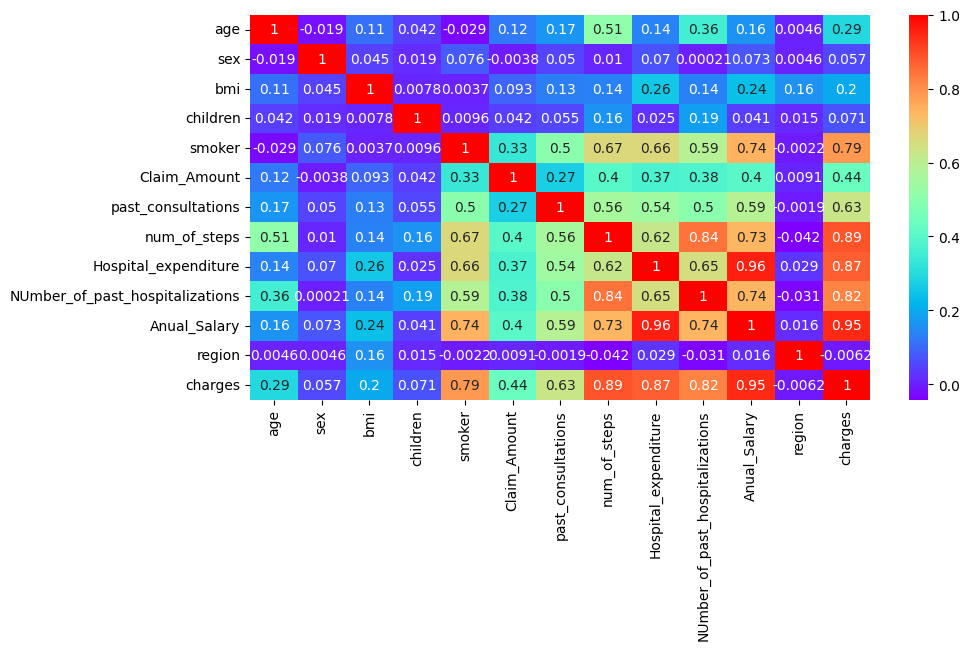

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(correlation,annot=True,cmap='rainbow')

### The correlation heatmap shows the columns that will be most useful for the modeling. The sex, children, and region column shows no considerable correlation.

## Data Preprocessing Before Model Training

In [ ]:
from sklearn.model_selection import train_test_split
#splitting the data for model 1
X = insurance.drop(['charges', 'age', 'sex', 'bmi', 'children', 'region'], axis=1) #Independent (features)
y = insurance.iloc[:,-1] #target/depended
#y=insurance['charges]

In [ ]:
X

,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary
0,0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07
1,0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07
2,0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07
3,0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07
4,0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07
...,...,...,...,...,...,...,...
1333,1,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09
1334,1,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09
1335,1,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09
1336,1,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09


In [ ]:
y

,charges
0,1121.87390
1,1131.50660
2,1135.94070
3,1136.39940
4,1137.01100
...,...
1333,55135.40209
1334,58571.07448
1335,60021.39897
1336,62592.87309


In [ ]:
a,b,c,d=1,2,3,4
print(a)
print(b)
print(c)

1
2
3


In [ ]:
#or
#y=insurance['charges']
#splitting the data for model 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#or
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


In [ ]:
X_train

,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary
621,0,14184.67664,22.0,890983.0,6.512320e+06,1.0,7.564824e+07
194,0,43988.96850,11.0,811187.0,2.418227e+06,1.0,1.074332e+08
240,0,22987.02313,20.0,813854.0,4.956462e+06,1.0,9.120422e+07
1168,0,27534.30280,15.0,1031312.0,2.543862e+07,2.0,8.690106e+08
1192,1,38838.01180,19.0,1049108.0,4.202504e+07,2.0,1.159497e+09
...,...,...,...,...,...,...,...
763,0,18094.64393,20.0,935382.0,1.052415e+07,1.0,1.393229e+08
835,0,30333.00033,21.0,935611.0,3.445156e+06,1.0,1.422656e+08
1216,1,24969.29952,25.0,1052642.0,4.883718e+07,2.0,1.377813e+09
559,0,33330.50185,21.0,885629.0,6.868865e+06,1.0,7.559974e+07


In [ ]:
X_test

,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary
578,0,31762.06218,18.0,898402.0,7.490337e+06,1.0,1.388538e+08
610,0,12207.16184,7.0,914552.0,3.474461e+06,1.0,1.607867e+08
569,0,32800.38085,19.0,898034.0,7.900849e+06,1.0,1.314127e+08
1034,1,35155.45242,17.0,979075.0,1.226416e+07,1.0,3.674079e+08
198,0,12942.46187,14.0,790605.0,3.101092e+06,1.0,5.291157e+07
...,...,...,...,...,...,...,...
1084,1,53279.99334,18.0,1005887.0,1.595273e+07,1.0,4.545239e+08
726,0,28219.04718,6.0,934704.0,6.333271e+06,1.0,1.094440e+08
1132,0,47575.32907,23.0,1002032.0,1.899911e+07,2.0,6.848551e+08
725,0,11235.87207,20.0,913921.0,9.429019e+06,1.0,1.889853e+08


In [ ]:
y_train

,charges
621,8604.48365
194,3056.38810
240,3594.17085
1168,28476.73499
1192,33900.65300
...,...
763,10923.93320
835,11856.41150
1216,36197.69900
559,7731.42710


In [ ]:
y_test

,charges
578,8116.26885
610,8534.67180
569,7986.47525
1034,18648.42170
198,3161.45400
...,...
1084,21223.67580
726,10231.49990
1132,24671.66334
725,10226.28420


### Standardizing the features
Normalizing the features so that the samples will have the same mean and standard deviation.

###3--->rescaling
###Normalization
###log

In [ ]:
#feature scaling using the standardscalar
from sklearn.preprocessing import StandardScaler
#scaling the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[-0.49268753, -1.22056004,  0.91339618, ..., -0.33711657,
        -0.09704766, -0.50639659],
       [-0.49268753,  0.68903002, -0.54372947, ..., -0.49258823,
        -0.09704766, -0.44929373],
       [-0.49268753, -0.65658512,  0.64846424, ..., -0.39619972,
        -0.09704766, -0.47844969],
       ...,
       [ 2.02968402, -0.52957873,  1.31079408, ...,  1.27015429,
         1.79097043,  1.83299081],
       [-0.49268753,  0.00613166,  0.78093021, ..., -0.32357692,
        -0.09704766, -0.50648372],
       [-0.49268753, -0.02493201, -0.0138656 , ..., -0.486169  ,
        -0.09704766, -0.34473555]])

In [ ]:
y_train_arr = y_train.values
y_train = y_train_arr.reshape((-1,1))

In [ ]:
y_train

array([[ 8604.48365],
       [ 3056.3881 ],
       [ 3594.17085],
       ...,
       [36197.699  ],
       [ 7731.4271 ],
       [ 9617.66245]])

In [ ]:
y_train = sc.fit_transform(y_train)

## Model Building

In [ ]:
from sklearn.linear_model import LinearRegression

model_uno = LinearRegression()
#fitting the model
model_uno.fit(X_train, y_train)

LinearRegression()

### Making predictions
1. We are making predictions on the test set of each of the  models.

In [ ]:
#predictions - Model
predictions = model_uno.predict(X_test)
predictions

array([[-2.97310249e-01],
       [-2.64711070e-01],
       [-3.00890346e-01],
       [ 5.08895236e-01],
       [-9.02081052e-01],
       [ 1.21617308e-01],
       [-1.22736872e+00],
       [ 2.18744203e+00],
       [ 1.90242237e+00],
       [ 2.96336052e+00],
       [-4.12081996e-01],
       [ 6.10961639e-01],
       [ 2.24734191e+00],
       [-5.91775593e-01],
       [-4.85780802e-02],
       [-5.50138176e-03],
       [-8.34604890e-02],
       [-8.98764878e-01],
       [ 1.12982323e+00],
       [ 3.28614242e-01],
       [ 1.20643245e-01],
       [-4.08294573e-01],
       [ 5.55779001e-01],
       [-1.27640256e-01],
       [ 7.76206331e-01],
       [-5.81561022e-01],
       [ 2.42856597e+00],
       [-5.13542404e-01],
       [-1.10457521e+00],
       [-3.93002963e-01],
       [-1.08552875e+00],
       [ 3.32905361e-01],
       [-1.68580053e-01],
       [-1.04672450e+00],
       [ 4.63840881e-01],
       [ 4.98736861e-01],
       [ 6.70354606e-01],
       [-1.18039251e+00],
       [-2.8

In [ ]:
y_test

,charges
578,8116.26885
610,8534.67180
569,7986.47525
1034,18648.42170
198,3161.45400
...,...
1084,21223.67580
726,10231.49990
1132,24671.66334
725,10226.28420


In [ ]:
predictions = sc.inverse_transform(predictions)
predictions

array([[ 9.49619170e+03],
       [ 9.88551145e+03],
       [ 9.45343595e+03],
       [ 1.91244010e+04],
       [ 2.27364118e+03],
       [ 1.44992861e+04],
       [-1.61114729e+03],
       [ 3.91706548e+04],
       [ 3.57667720e+04],
       [ 4.84371578e+04],
       [ 8.12551584e+03],
       [ 2.03433417e+04],
       [ 3.98860165e+04],
       [ 5.97950272e+03],
       [ 1.24667066e+04],
       [ 1.29811554e+04],
       [ 1.20501191e+04],
       [ 2.31324500e+03],
       [ 2.65399107e+04],
       [ 1.69713728e+04],
       [ 1.44876533e+04],
       [ 8.17074762e+03],
       [ 1.96843162e+04],
       [ 1.15224967e+04],
       [ 2.23167970e+04],
       [ 6.10149150e+03],
       [ 4.20503074e+04],
       [ 6.91381231e+03],
       [-1.44670437e+02],
       [ 8.35336957e+03],
       [ 8.27941986e+01],
       [ 1.70226200e+04],
       [ 1.10335681e+04],
       [ 5.46218849e+02],
       [ 1.85863337e+04],
       [ 1.90030833e+04],
       [ 2.10526496e+04],
       [-1.05012795e+03],
       [ 9.6

In [ ]:
y_test

,charges
578,8116.26885
610,8534.67180
569,7986.47525
1034,18648.42170
198,3161.45400
...,...
1084,21223.67580
726,10231.49990
1132,24671.66334
725,10226.28420


## Model Evaluation

### Approach for the evaluation
1. We are calculating the r2 score


In [ ]:
from sklearn.metrics import *

r2_score(y_test, predictions)


0.9857109930672098

In [ ]:
#R2=CLOSE TO 1 IS GOOD  #-inf-1
#good range is closed to 1
#rmse=focus on big mistake
#0 to inf
#close to 0 is good
#MEA=trating all mistake equally
#0 to inf
#good range is close to 0
